In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

datapath = "/content/gdrive/My Drive/Datasets/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Library Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader as DL
from torch.nn.utils import weight_norm as WN
import torch.nn.functional as F

from xgboost import XGBClassifier

from time import time
import random as r

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Helper Fucntions

In [3]:
def breaker():
  print("\n" + 30*"-" + "\n")

def head(x, no_of_ele=5):
  breaker()
  print(x[:no_of_ele])
  breaker()

def getCol(x):
  return [col for col in x.columns]

# Data Handling

**Inputs**

In [4]:
dataset = pd.read_csv(datapath + "BreastCancer.csv")

breaker()
print(dataset.head(5))
breaker()
print("Dataset Shape :", repr(dataset.shape))
breaker()
for names in getCol(dataset):
  print(names)
breaker()


------------------------------

   Sample code number  Clump Thickness  ...  Mitoses  Class
0             1000025                5  ...        1      2
1             1002945                5  ...        1      2
2             1015425                3  ...        1      2
3             1016277                6  ...        1      2
4             1017023                4  ...        1      2

[5 rows x 11 columns]

------------------------------

Dataset Shape : (683, 11)

------------------------------

Sample code number
Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei
Bland Chromatin
Normal Nucleoli
Mitoses
Class

------------------------------



**Processing**

In [5]:
features = dataset.iloc[:, 1:-1].copy().values.astype(float)
labels   = dataset.iloc[:, -1].copy().values.astype(float)
labels[np.argwhere(labels == 2)] = 0
labels[np.argwhere(labels == 4)] = 1

num_features = features.shape[1]
num_obs_test = 83

X, X_test, y, y_test = train_test_split(features, labels, test_size=num_obs_test, random_state=0)

**Dataset Template**

In [6]:
class DS(Dataset):
  def __init__(this, X=None, y=None, mode = "train"):
    this.mode = mode
    this.X = X
    if mode == "train":
      this.y = y
    
  def __len__(this):
    return this.X.shape[0]

  def __getitem__(this, idx):
    if this.mode == "train":
      return torch.FloatTensor(this.X[idx]), torch.FloatTensor(this.y[idx])
    else:
      return torch.FloatTensor(this.X[idx])

# Sklearn and XGB

In [7]:
accs = []
f1_s = []

########## LogReg ###########
lgr = LogisticRegression()
lgr.fit(X, y)
y_pred = lgr.predict(X_test)

breaker()
print("LGR Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("LGR F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## KNC ###########
knc = KNeighborsClassifier()
knc.fit(X, y)
y_pred = knc.predict(X_test)

breaker()
print("KNC Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("KNC F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## GNB ###########
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X_test)

breaker()
print("GNB Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("GNB F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## SVC ###########
svc = SVC(kernel="rbf")
svc.fit(X, y)
y_pred = svc.predict(X_test)

breaker()
print("SVC Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("SVC F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## DTC ###########
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X, y)
y_pred = dtc.predict(X_test)

breaker()
print("DTC Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("DTC F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## RFC ###########
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X, y)
y_pred = rfc.predict(X_test)

breaker()
print("RFC Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("RFC F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

########## XGC ###########
xgc = XGBClassifier(random_state=0)
xgc.fit(X, y)
y_pred = xgc.predict(X_test)

breaker()
print("XGC Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("XGC F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))

breaker()


------------------------------

LGR Accuracy : 0.98795
LGR F1 Score : 0.98182

------------------------------

KNC Accuracy : 0.98795
KNC F1 Score : 0.98182

------------------------------

GNB Accuracy : 0.96386
GNB F1 Score : 0.94737

------------------------------

SVC Accuracy : 0.98795
SVC F1 Score : 0.98182

------------------------------

DTC Accuracy : 0.98795
DTC F1 Score : 0.98182

------------------------------

RFC Accuracy : 0.98795
RFC F1 Score : 0.98182

------------------------------

XGC Accuracy : 0.97590
XGC F1 Score : 0.96296

------------------------------



# ANN

**Config**

In [8]:
class CFG():
  tr_batch_size = 32
  ts_batch_size = 32
  va_batch_size = 32

  epochs = 50
  n_folds = 5

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  IL = num_features
  HL_1 = [128]
  HL_2 = [128, 64]
  OL = 1

cfg = CFG()

ts_data_setup = DS(X_test, None, "test")
ts_data = DL(ts_data_setup, batch_size=cfg.ts_batch_size, shuffle=False)

full_data_setup = DS(features, None, "test")
full_data = DL(full_data_setup, batch_size=cfg.ts_batch_size, shuffle=False)

**Setup**

In [9]:
class ANN(nn.Module):
  def __init__(this, IL=None, HL=None, OL=None):
    super(ANN, this).__init__()

    this.HL = HL
    this.DP1 = nn.Dropout(p=0.2)
    this.DP2 = nn.Dropout(p=0.5)

    if len(HL) == 1:
      this.BN1 = nn.BatchNorm1d(IL)
      this.FC1 = WN(nn.Linear(IL, HL[0]))

      this.BN2 = nn.BatchNorm1d(HL[0])
      this.FC2 = WN(nn.Linear(HL[0], OL))

    elif len(HL) == 2:
      this.BN1 = nn.BatchNorm1d(IL)
      this.FC1 = WN(nn.Linear(IL, HL[0]))

      this.BN2 = nn.BatchNorm1d(HL[0])
      this.FC2 = WN(nn.Linear(HL[0], HL[1]))

      this.BN3 = nn.BatchNorm1d(HL[1])
      this.FC3 = WN(nn.Linear(HL[1], OL))

    else:
      raise NotImplementedError("Only Supports Networks of Depth 1 and 2")

  def getOptimizer(this, lr=1e-3, wd=0):
    return optim.Adam(this.parameters(), lr=lr, weight_decay=wd)

  def forward(this, x):
    if len(this.HL) == 1:
      x = this.BN1(x)
      x = this.DP1(x)
      x = F.relu(this.FC1(x))

      x = this.BN2(x)
      x = this.DP2(x)
      x = this.FC2(x)

      return x
    else:
      x = this.BN1(x)
      x = this.DP1(x)
      x = F.relu(this.FC1(x))

      x = this.BN2(x)
      x = this.DP2(x)
      x = F.relu(this.FC2(x))

      x = this.BN3(x)
      x = this.DP2(x)
      x = this.FC3(x)

      return x

**ANN Helpers**

In [10]:
def train_fn(X=None, y=None, n_folds=None, HL_Used=None):
  breaker()
  print("Training ...")
  breaker()

  LP = []
  names = []
  fold = 0
  bestLoss = {"train" : np.inf, "valid" : np.inf}

  start_time = time()
  for tr_idx, va_idx in KFold(n_splits=n_folds, shuffle=True, random_state=0).split(X, y):
    print("Processing Fold {fold} ...".format(fold=fold+1))

    X_train, X_valid, y_train, y_valid = X[tr_idx], X[va_idx], y[tr_idx], y[va_idx]

    tr_data_setup = DS(X_train, y_train.reshape(-1,1))
    va_data_setup = DS(X_valid, y_valid.reshape(-1,1))

    dataloaders = {"train" : DL(tr_data_setup, batch_size=cfg.tr_batch_size, shuffle=True, generator=torch.manual_seed(0)),
                   "valid" : DL(va_data_setup, batch_size=cfg.va_batch_size, shuffle=False)}

    torch.manual_seed(0)
    model = ANN(cfg.IL, HL_Used, cfg.OL)
    model.to(cfg.device)

    optimizer = model.getOptimizer()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, patience=5, eps=1e-6, verbose=True)

    for e in range(cfg.epochs):
      epochLoss = {"train" : 0, "valid" : 0}
      for phase in ["train", "valid"]:
          if phase == "train":
            model.train()
          else:
            model.eval()
          lossPerPass = 0

          for feat, label in dataloaders[phase]:
            feat, label = feat.to(cfg.device), label.to(cfg.device)

            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == "train"):
              output = model(feat)
              loss   = nn.BCEWithLogitsLoss()(output, label)
              if phase == "train":
                loss.backward()
                optimizer.step()
            lossPerPass += (loss.item() / label.shape[0])
          epochLoss[phase] = lossPerPass
      LP.append(epochLoss)
      scheduler.step(epochLoss["valid"])
      if epochLoss["valid"] < bestLoss["valid"]:
        bestLoss = epochLoss
        name = "Model_{ids}_Fold_{fold}.pt".format(ids=len(HL_Used), fold=fold)
        names.append(name)
        torch.save(model.state_dict(), datapath + name)
    fold += 1

  breaker()
  print("Time Taken to Train {f} folds for {e} epochs : {:.2f} minutes".format((time() - start_time)/60, f=n_folds, e=cfg.epochs))
  breaker()
  print("Best Loss :", repr(bestLoss))
  breaker()

  return LP, names, model

def eval_fn(model=None, names=None, dataloader=None, num_obs_test=None):
  y_pred = np.zeros((num_obs_test, 1))

  for name in names:
    Pred = torch.zeros(cfg.ts_batch_size, 1).to(cfg.device)

    model.load_state_dict(torch.load(datapath+name))
    model.eval()

    for X in dataloader:
      X = X.to(cfg.device)
      with torch.no_grad():
        output = torch.sigmoid(model(X))
      Pred = torch.cat((Pred, output), dim=0)
    Pred = Pred[cfg.ts_batch_size:].cpu().numpy()
    y_pred = np.add(y_pred, Pred)
  y_pred = np.divide(y_pred, len(names))
  y_pred[np.argwhere(y_pred > 0.5)]  = 1
  y_pred[np.argwhere(y_pred <= 0.5)] = 0
  return y_pred

# Configuration 1


------------------------------

Training ...

------------------------------

Processing Fold 1 ...
Epoch    28: reducing learning rate of group 0 to 1.0000e-04.
Epoch    36: reducing learning rate of group 0 to 1.0000e-05.
Epoch    42: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 2 ...
Epoch    27: reducing learning rate of group 0 to 1.0000e-04.
Epoch    33: reducing learning rate of group 0 to 1.0000e-05.
Epoch    39: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 3 ...
Epoch    20: reducing learning rate of group 0 to 1.0000e-04.
Epoch    31: reducing learning rate of group 0 to 1.0000e-05.
Epoch    37: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 4 ...
Epoch    32: reducing learning rate of group 0 to 1.0000e-04.
Epoch    38: reducing learning rate of group 0 to 1.0000e-05.
Epoch    44: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 5 ...
Epoch    40: reducing learning rate of group 0 to 1.0000e-04.
Epoch

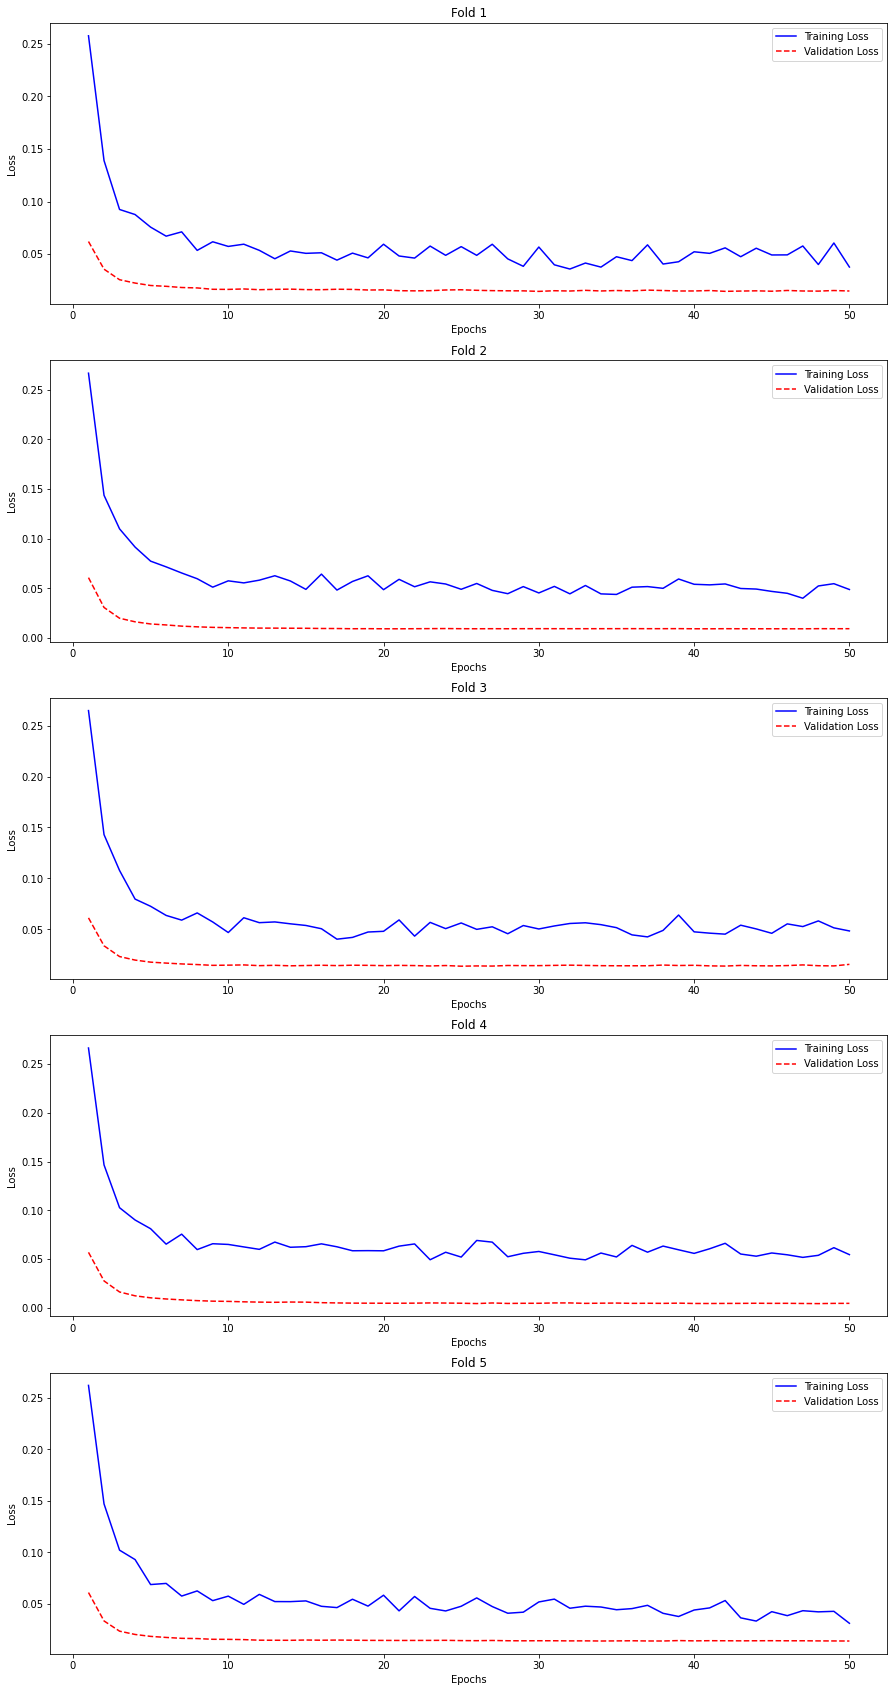

In [11]:
LP_1, Names_1, Network_1 = train_fn(X=X, y=y, n_folds=cfg.n_folds, HL_Used=cfg.HL_1)

y_pred = eval_fn(Network_1, set(Names_1), ts_data, ts_data_setup.__len__())

print("Configuration 1 Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("Configuration 1 F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))
breaker()

LPV = []
LPT = []
for i in range(len(LP_1)):
  LPT.append(LP_1[i]["train"])
  LPV.append(LP_1[i]["valid"])

xAxis = [i+1 for i in range(cfg.epochs)]
plt.figure(figsize=(15, 30))
for fold in range(cfg.n_folds):
    plt.subplot(cfg.n_folds, 1, fold+1)
    plt.plot(xAxis, LPT[fold*cfg.epochs:(fold+1)*cfg.epochs], "b", label="Training Loss")
    plt.plot(xAxis, LPV[fold*cfg.epochs:(fold+1)*cfg.epochs], "r--", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Fold {fold}".format(fold=fold+1))
plt.show()

# Configuration 2


------------------------------

Training ...

------------------------------

Processing Fold 1 ...
Epoch    25: reducing learning rate of group 0 to 1.0000e-04.
Epoch    31: reducing learning rate of group 0 to 1.0000e-05.
Epoch    37: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 2 ...
Epoch    26: reducing learning rate of group 0 to 1.0000e-04.
Epoch    32: reducing learning rate of group 0 to 1.0000e-05.
Epoch    38: reducing learning rate of group 0 to 1.0000e-06.
Processing Fold 3 ...
Epoch    34: reducing learning rate of group 0 to 1.0000e-04.
Epoch    45: reducing learning rate of group 0 to 1.0000e-05.
Processing Fold 4 ...
Epoch    45: reducing learning rate of group 0 to 1.0000e-04.
Processing Fold 5 ...
Epoch    30: reducing learning rate of group 0 to 1.0000e-04.
Epoch    40: reducing learning rate of group 0 to 1.0000e-05.
Epoch    46: reducing learning rate of group 0 to 1.0000e-06.

------------------------------

Time Taken to Train 5 folds for 50

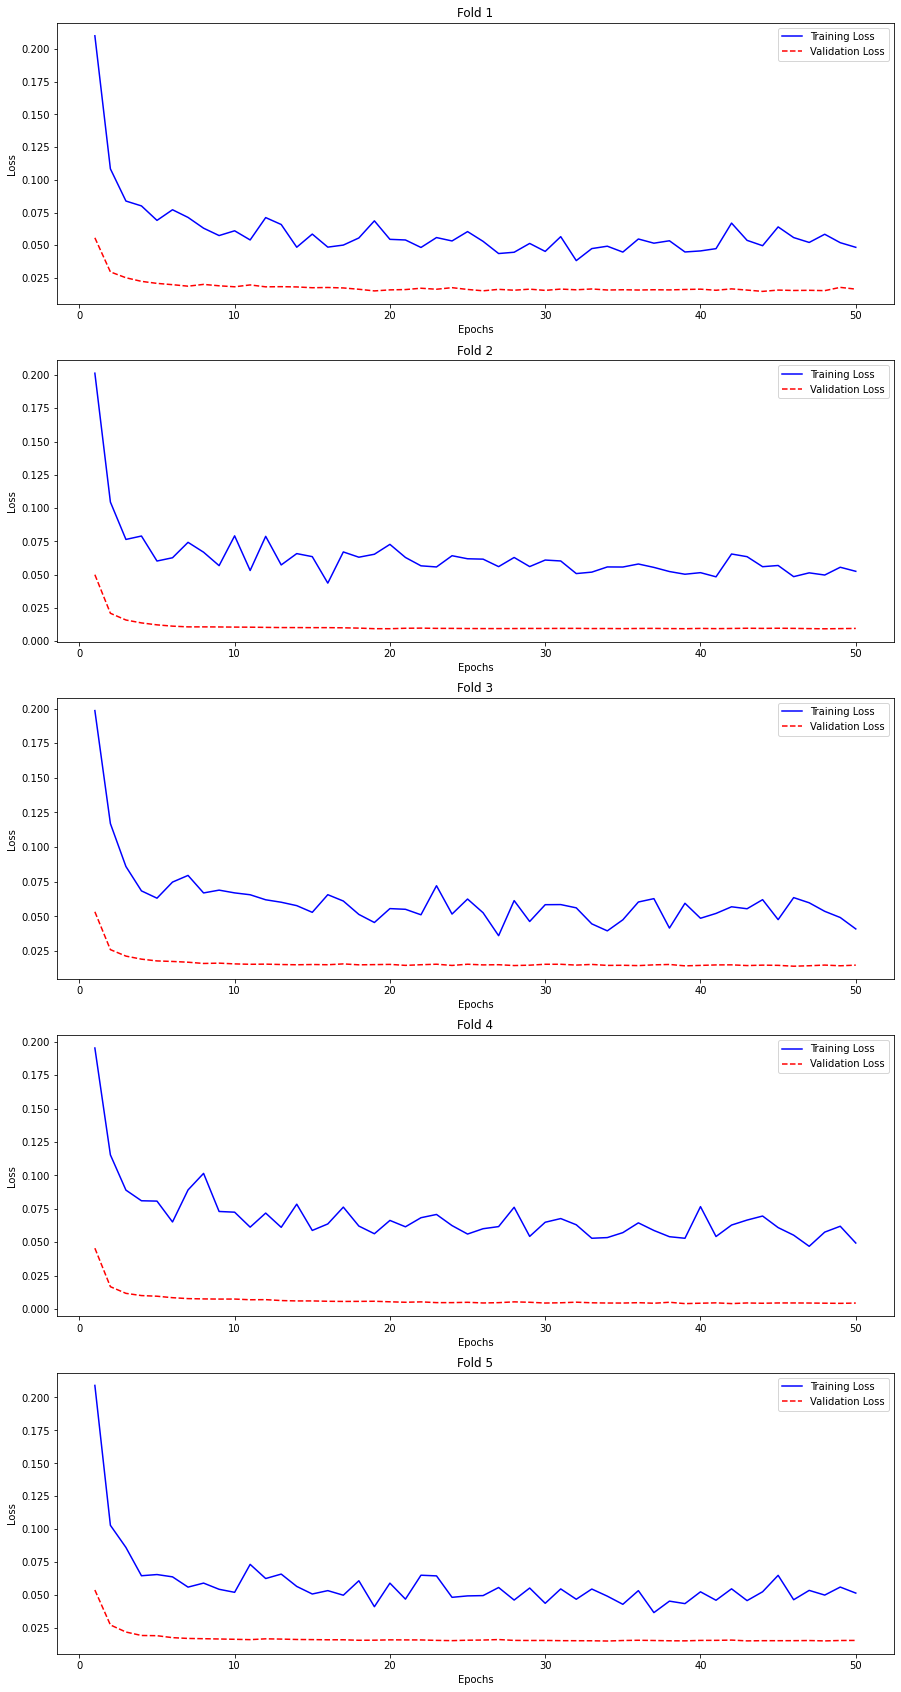

In [12]:
LP_2, Names_2, Network_2 = train_fn(X=X, y=y, n_folds=cfg.n_folds, HL_Used=cfg.HL_2)

y_pred = eval_fn(Network_2, set(Names_2), ts_data, ts_data_setup.__len__())

print("Configuration 2 Accuracy : {:.5f}".format(accuracy_score(y_test, y_pred)))
print("Configuration 2 F1 Score : {:.5f}".format(f1_score(y_test, y_pred)))
accs.append(accuracy_score(y_test, y_pred))
f1_s.append(f1_score(y_test, y_pred))
breaker()

LPV = []
LPT = []
for i in range(len(LP_2)):
  LPT.append(LP_2[i]["train"])
  LPV.append(LP_2[i]["valid"])

xAxis = [i+1 for i in range(cfg.epochs)]
plt.figure(figsize=(15, 30))
for fold in range(cfg.n_folds):
    plt.subplot(cfg.n_folds, 1, fold+1)
    plt.plot(xAxis, LPT[fold*cfg.epochs:(fold+1)*cfg.epochs], "b", label="Training Loss")
    plt.plot(xAxis, LPV[fold*cfg.epochs:(fold+1)*cfg.epochs], "r--", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Fold {fold}".format(fold=fold+1))
plt.show()

# Plots

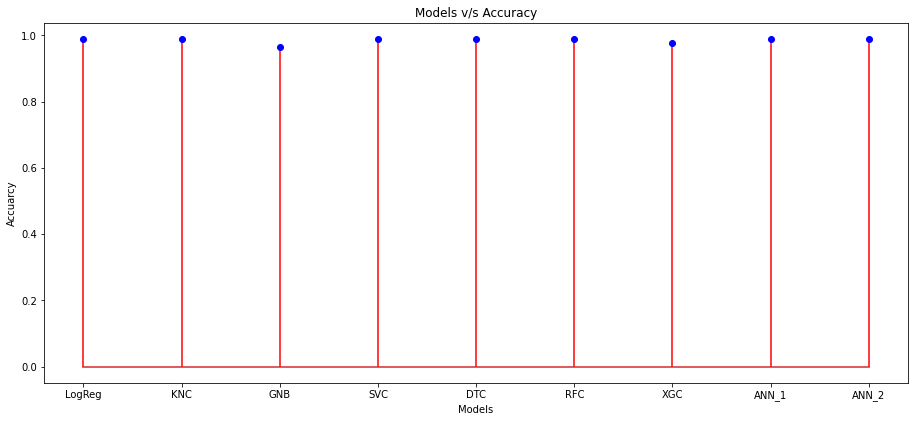

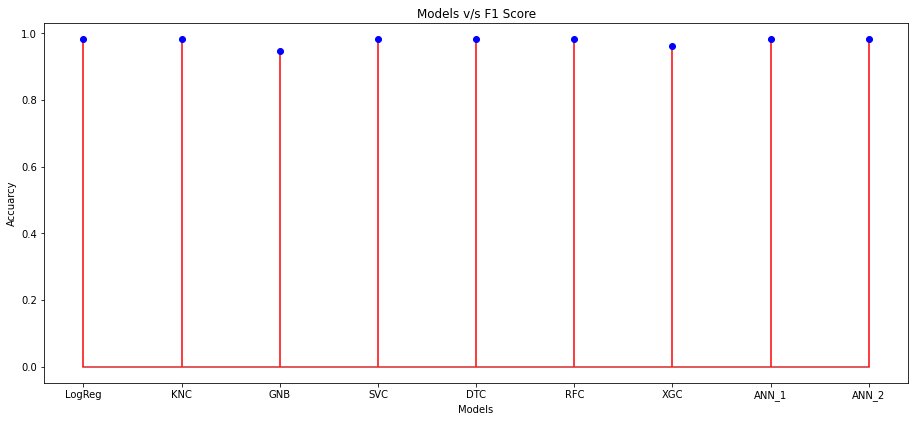

In [13]:
labels = ["LogReg", "KNC", "GNB", "SVC", "DTC", "RFC", "XGC", "ANN_1", "ANN_2"]

x_Axis = [i for i in range(len(accs))]

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.stem(x_Axis, accs, markerfmt="bo", linefmt="r-", use_line_collection=True)
ax.set_xlabel("Models")
ax.set_ylabel("Accuarcy")
ax.set_title("Models v/s Accuracy")
ax.set_xticks(x_Axis)
ax.set_xticklabels(labels)
plt.show()

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([1, 1, 1, 1])
ax.stem(x_Axis, f1_s, markerfmt="bo", linefmt="r-", use_line_collection=True)
ax.set_xlabel("Models")
ax.set_ylabel("Accuarcy")
ax.set_title("Models v/s F1 Score")
ax.set_xticks(x_Axis)
ax.set_xticklabels(labels)
plt.show()